## Importing libraries and data 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import raw data 
ratings=pd.read_csv('ml-latest-small/ratings.csv')
ratings.drop('timestamp', axis=1, inplace=True)
movies=pd.read_csv('ml-latest-small/movies.csv')
tags=pd.read_csv('ml-latest-small/tags.csv')
tags.drop(['userId', 'timestamp'], axis=1, inplace=True)

In [4]:
#merging tables 
movies1=pd.merge(ratings, movies, on=['movieId', 'movieId'], how='outer', indicator=True)
movies1.drop(movies1.index[movies1._merge=='right_only'], inplace=True)
movies1.drop('_merge', axis=1, inplace=True)

In [12]:
movies2=pd.merge(movies1, tags, on=['movieId', 'movieId'], how='outer', indicator=True)
movies2.drop(movies2.index[movies2._merge=='right_only'], inplace=True)
movies2.drop('_merge', axis=1, inplace=True)
movies2.head()

,userId,movieId,rating,title,genres,tag
0,1.0,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
1,1.0,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
2,1.0,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
3,5.0,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
4,5.0,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar


## Exploring the data

#### Movie Tag Frequency

In [13]:
pd.DataFrame(movies2.tag.value_counts())

,tag
sci-fi,2527
thought-provoking,2487
twist ending,2434
atmospheric,2227
dark comedy,2056
...,...
Tolstoy,1
representation of children,1
procedural,1
abstract,1


In [14]:
movies2.tag.value_counts().describe()

count    1584.000000
mean      147.230429
std       256.403571
min         1.000000
25%        15.000000
50%        54.000000
75%       181.500000
max      2527.000000
Name: tag, dtype: float64

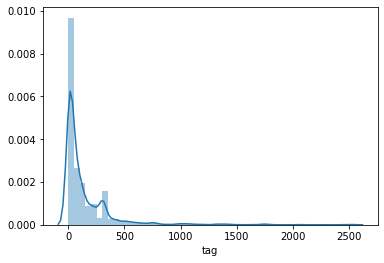

In [15]:
sns.distplot(movies2.tag.value_counts())

#### Users that gave the most ratings 

In [16]:
user_rate=pd.DataFrame(movies2.groupby('userId')['rating'].count())

In [17]:
user_rate

,rating
userId,
1.0,711
2.0,152
3.0,51
4.0,674
5.0,283
...,...
606.0,2075
607.0,533
608.0,1773


In [18]:
user_rate.describe()

,rating
count,610.000000
mean,468.462295
std,514.349146
min,21.000000
25%,136.250000
50%,319.500000
75%,589.000000
max,4214.000000


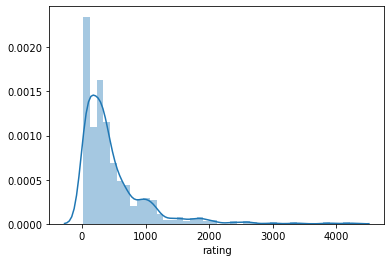

In [19]:
sns.distplot(user_rate.rating)

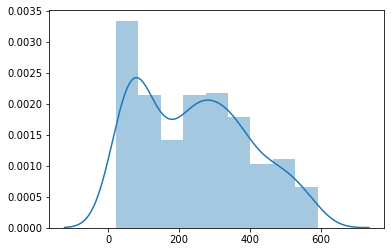

In [20]:
#removing the top 25% active users
sns.distplot(user_rate[user_rate['rating']<600])

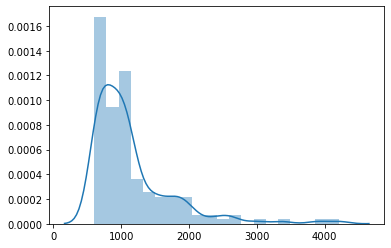

In [21]:
#use only the top 25% active users
sns.distplot(user_rate[user_rate['rating']>600])

In [22]:
user_rate[user_rate['rating']<600]

,rating
userId,
2.0,152
3.0,51
5.0,283
7.0,415
8.0,297
...,...
602.0,474
604.0,379
605.0,581


#### How many films categorized in each rating

In [23]:
pd.DataFrame(movies2.groupby('movieId')['rating'].count()).sort_values('rating', ascending=False)

,rating
movieId,
296,55567
2959,11772
260,6526
293,4655
924,4469
...,...
2481,1
44849,1
44851,1


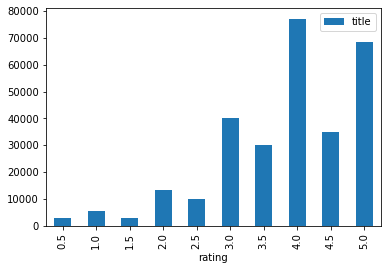

In [24]:
pd.DataFrame(movies2.groupby('rating')['title'].count()).plot(kind='bar')

#### Which films got the highest ratings

In [25]:
pd.DataFrame(movies2.groupby('title')['rating'].mean()).sort_values('rating', ascending=False)

,rating
title,
Gena the Crocodile (1969),5.0
True Stories (1986),5.0
Cosmic Scrat-tastrophe (2015),5.0
Love and Pigeons (1985),5.0
Red Sorghum (Hong gao liang) (1987),5.0
...,...
Don't Look Now (1973),0.5
Journey 2: The Mysterious Island (2012),0.5
Joe Dirt 2: Beautiful Loser (2015),0.5


#### Average rate each user gave

In [26]:
pd.DataFrame(movies2.groupby('userId')['rating'].mean()).sort_values('rating', ascending=False)

,rating
userId,
53.0,5.000000
251.0,4.969027
515.0,4.957711
348.0,4.907658
25.0,4.905028
...,...
308.0,2.015888
3.0,1.980392
126.0,1.821168


In [27]:
movies2.groupby('userId')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
userId,,,,,,,,
1.0,711.0,4.088608,1.009405,1.0,3.0,4.0,5.0,5.0
2.0,152.0,3.990132,0.644566,2.0,3.5,4.0,4.5,5.0
3.0,51.0,1.980392,2.002401,0.5,0.5,0.5,4.5,5.0
4.0,674.0,2.802671,1.558543,1.0,1.0,3.0,4.0,5.0
5.0,283.0,4.487633,0.843639,1.0,4.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...
606.0,2075.0,3.931566,0.788595,0.5,3.5,4.0,4.5,5.0
607.0,533.0,3.575985,0.897126,1.0,3.0,3.0,4.0,5.0
608.0,1773.0,3.582628,1.085027,0.5,3.0,4.0,4.5,5.0


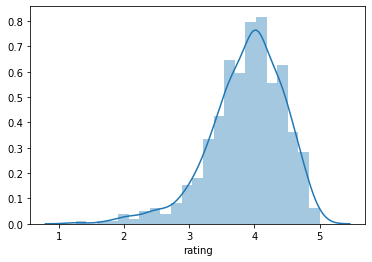

In [28]:
sns.distplot(movies2.groupby('userId')['rating'].mean())

#### Movies that were rated the most (highly watched films)

In [29]:
title_dist=pd.DataFrame(movies2.groupby('title')['rating'].count())
title_dist

,rating
title,
'71 (2014),1
'Hellboy': The Seeds of Creation (2004),1
'Round Midnight (1986),2
'Salem's Lot (2004),1
'Til There Was You (1997),2
...,...
eXistenZ (1999),22
xXx (2002),24
xXx: State of the Union (2005),5


In [30]:
title_dist.describe()

,rating
count,9719.000000
mean,29.402408
std,596.179496
min,1.000000
25%,1.000000
50%,3.000000
75%,9.000000
max,55567.000000


In [31]:
title_dist[title_dist.rating < 9]

,rating
title,
'71 (2014),1
'Hellboy': The Seeds of Creation (2004),1
'Round Midnight (1986),2
'Salem's Lot (2004),1
'Til There Was You (1997),2
...,...
[REC]² (2009),3
[REC]³ 3 Génesis (2012),2
anohana: The Flower We Saw That Day - The Movie (2013),1


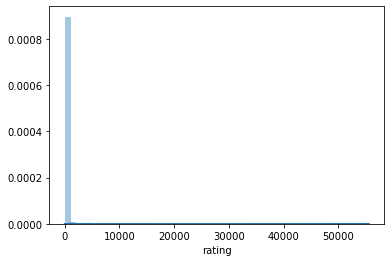

In [32]:
sns.distplot(movies2.groupby('title')['rating'].count())

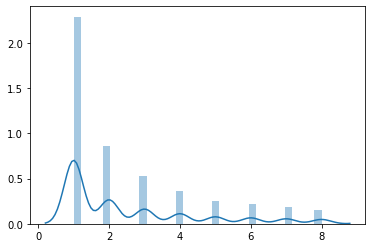

In [35]:
sns.distplot(title_dist[title_dist.rating < 9])